# What are the components of a time series?

# What is the purpose of using exponential smoothing methods

A time series is a sequence of observations which are ordered in time. Inherent in the collection of data taken over time is some form of random variation. There exist methods for reducing of canceling the effect due to random variation. Widely used techniques are "smoothing".

Exponential Smoothing: This is a very popular scheme to produce a smoothed Time Series. Whereas in Moving Averages the past observations are weighted equally, Exponential Smoothing assigns exponentially decreasing weights as the observation get older. In other words, recent observations are given relatively more weight in forecasting than the older observations

# What are the two types of moving averages that can be used?

# Explain seasonality in a time series. In what ways can it be identified?

# Section-2

# What is a random walk model? How is it related to autocorrelation?

A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. An elementary example of a random walk is the random walk on the integer number line,  Z  , which starts at 0 and at each step moves +1 or −1 with equal probability. 

Random walk process is defined as: y(t) =  β0+β1Xt−1  +  ϵt 
where


Random Walk and Autocorrelation
We calculate the correlation between each observation and the observations at previous time steps.
Autocorrelation plot or a correlogram plot is a plot of these correlations.
We expect a strong auto-correlation with the previous observation and a linear fall oﬀ from there with previous lag values.

# What is stationarity? What are the necessary conditions to determine if a series is stationary?

conditions: 1.it should have constant mean according to time.
  2.  constant variance at different intervals
  3.  autocorrelation doesnot depend on time

# How does the acf and pacf help in fitting an ARIMA model?

# What are thevarious measures that can be used for evaluating a time series model?

In [ ]:
MAPE- mean absolute percentage error

In [ ]:
RMSE-Rootmean square error

In [ ]:
RSS-residuals sum of sqaures

# section 3

# Consider the AirPassengers.csv data set, Analyse the data set to perform the expected below tasks.

# (a)	Load Time Series data in Pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [3]:
data = pd.read_csv('AirPassengers.csv')


In [4]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [7]:
date_rng = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
date_rng

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [8]:
data['TimeIndex'] = pd.DataFrame(date_rng, columns=['Month'])

In [9]:
data.head()

,Month,#Passengers,TimeIndex
0,1949-01,112,1949-01-31
1,1949-02,118,1949-02-28
2,1949-03,132,1949-03-31
3,1949-04,129,1949-04-30
4,1949-05,121,1949-05-31


In [10]:
data.set_index('TimeIndex', inplace=True)

In [11]:
data.head()

,Month,#Passengers
TimeIndex,,
1949-01-31,1949-01,112
1949-02-28,1949-02,118
1949-03-31,1949-03,132
1949-04-30,1949-04,129
1949-05-31,1949-05,121


In [12]:
data.drop('Month',axis=1,inplace=True)

In [13]:
data.head()

,#Passengers
TimeIndex,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [14]:
data.columns

Index([u'#Passengers'], dtype='object')

In [15]:
data.head()

,#Passengers
TimeIndex,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [16]:
data.to_csv('airpassenger_is.csv',index=0)

In [45]:
pas_ts = data['#Passengers']

# Checking for stationarity

# Plot the time-series

Text(0, 0.5, 'passengers')

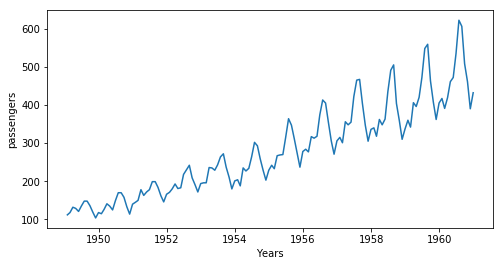

In [46]:
plt.figure(figsize=(8, 4))
plt.plot(pas_ts)
plt.xlabel('Years')
plt.ylabel('passengers')

In [53]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [54]:
dates = pd.date_range(start='1/1/1949', end='31/12/1960', freq='M')
dates

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [55]:
data.drop(['Month'], axis=1, inplace=True)

In [56]:
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data['Year'] = dates.year

In [57]:

data = data[['Month', 'Year', '#Passengers']]

In [58]:
data.set_index(dates, inplace=True)

In [59]:
data.head(5)

,Month,Year,#Passengers
1949-01-31,Jan,1949,112
1949-02-28,Feb,1949,118
1949-03-31,Mar,1949,132
1949-04-30,Apr,1949,129
1949-05-31,May,1949,121


In [60]:
sales_ts = data['#Passengers']

# checking stationarty

Text(0, 0.5, 'passengers')

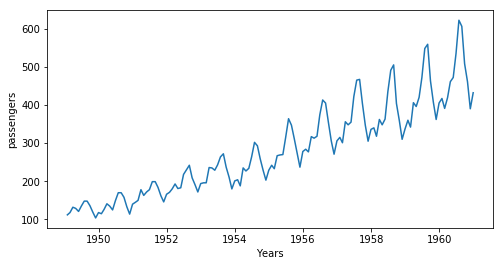

In [61]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('passengers')

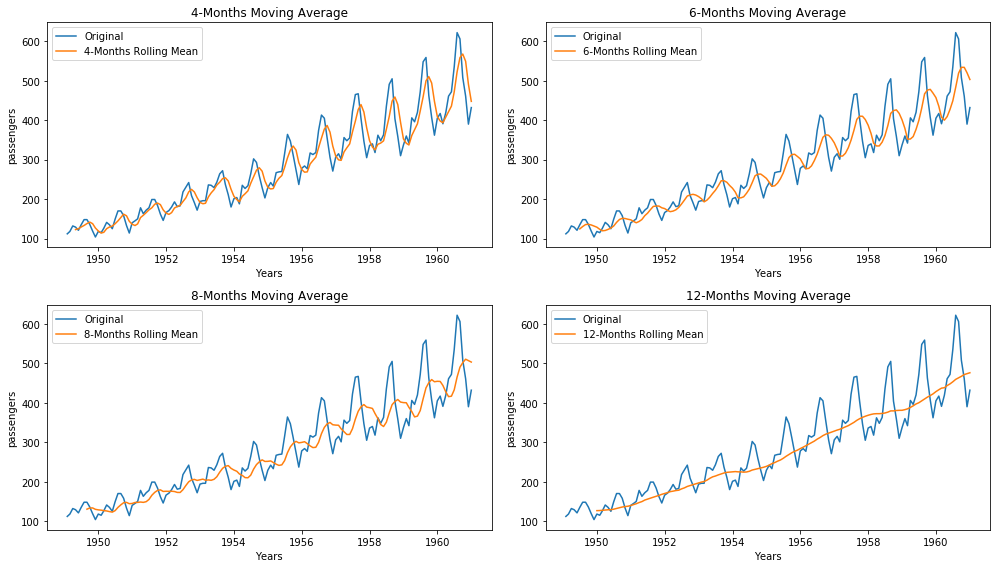

In [64]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel('passengers')
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel('passengers')
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel('passengers')
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel('passengers')
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()


In [65]:
#Determing rolling statistics
rolmean = sales_ts.rolling(window=12).mean()
rolstd = sales_ts.rolling(window=12).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

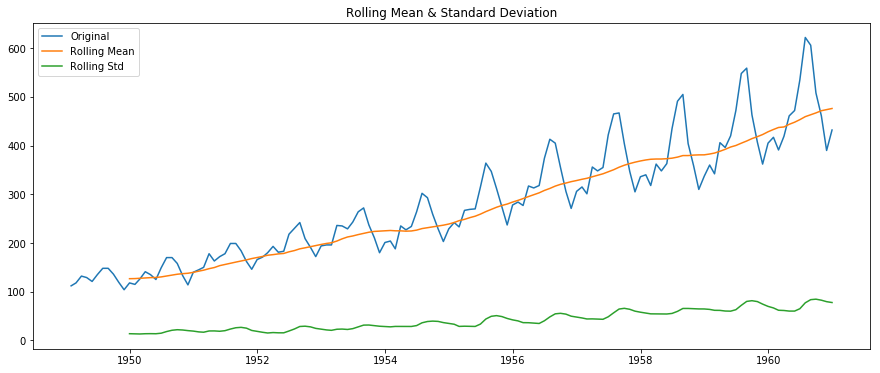

In [66]:
#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [67]:
from statsmodels.tsa.stattools import adfuller

In [68]:
dftest = adfuller(sales_ts)
dftest

(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

In [72]:
monthly_sales_data = pd.pivot_table(data, values = '#Passengers', columns = "Year", index = "Month")
monthly_sales_data

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
Apr,129,135,163,181,235,227,269,313,348,348,396,461
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Dec,118,140,166,194,201,229,278,306,336,337,405,432
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Mar,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


In [71]:
data.columns

Index(['Month', 'Year', '#Passengers'], dtype='object')

In [73]:
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
Month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


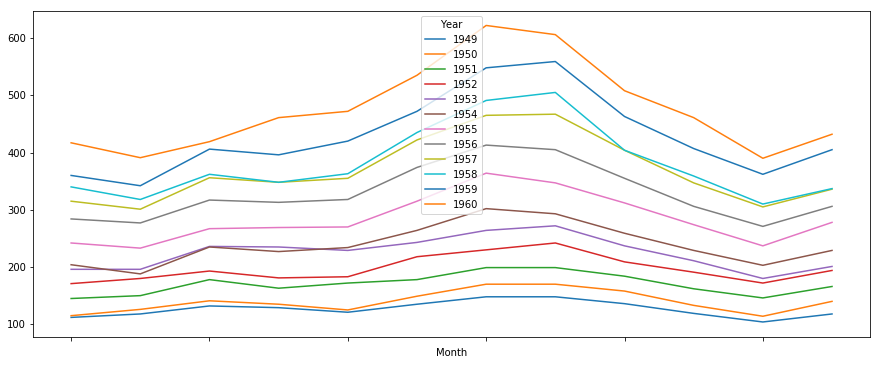

In [74]:
monthly_sales_data.plot()

In [75]:
yearly_sales_data = pd.pivot_table(data, values='#Passengers', columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


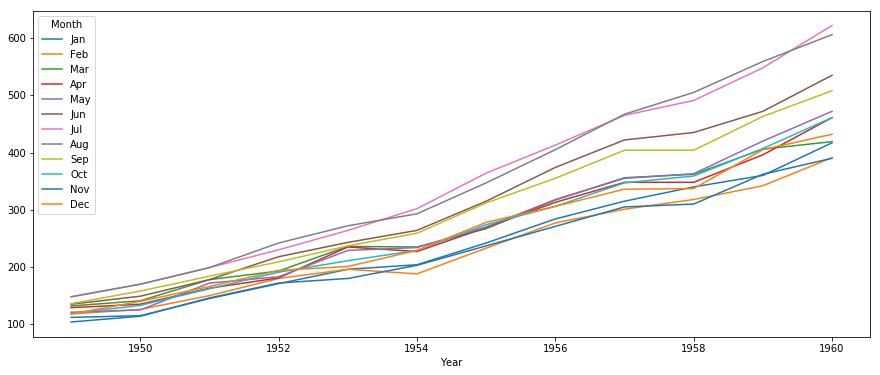

In [76]:
yearly_sales_data.plot()

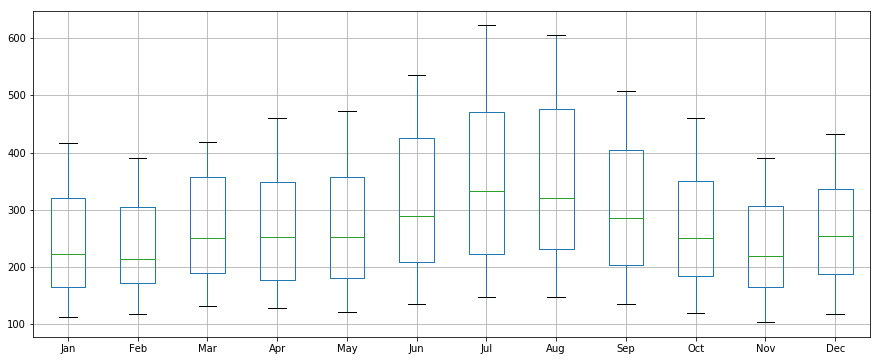

In [77]:
yearly_sales_data.boxplot()

In [79]:

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

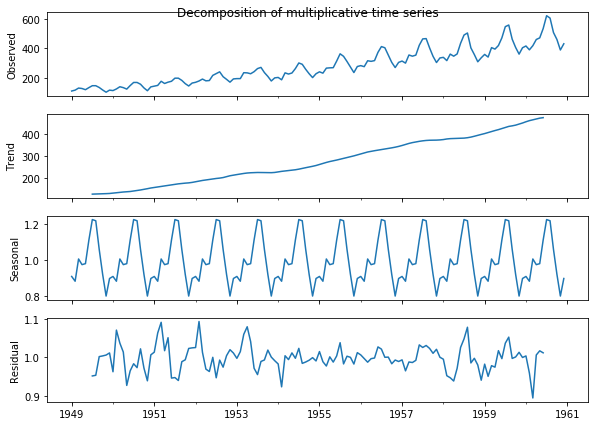

In [80]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [81]:
seasonal=decomposition.seasonal
seasonal

1949-01-31    0.910230
1949-02-28    0.883625
1949-03-31    1.007366
1949-04-30    0.975906
1949-05-31    0.981378
1949-06-30    1.112776
1949-07-31    1.226556
1949-08-31    1.219911
1949-09-30    1.060492
1949-10-31    0.921757
1949-11-30    0.801178
1949-12-31    0.898824
1950-01-31    0.910230
1950-02-28    0.883625
1950-03-31    1.007366
1950-04-30    0.975906
1950-05-31    0.981378
1950-06-30    1.112776
1950-07-31    1.226556
1950-08-31    1.219911
1950-09-30    1.060492
1950-10-31    0.921757
1950-11-30    0.801178
1950-12-31    0.898824
1951-01-31    0.910230
1951-02-28    0.883625
1951-03-31    1.007366
1951-04-30    0.975906
1951-05-31    0.981378
1951-06-30    1.112776
                ...   
1958-07-31    1.226556
1958-08-31    1.219911
1958-09-30    1.060492
1958-10-31    0.921757
1958-11-30    0.801178
1958-12-31    0.898824
1959-01-31    0.910230
1959-02-28    0.883625
1959-03-31    1.007366
1959-04-30    0.975906
1959-05-31    0.981378
1959-06-30    1.112776
1959-07-31 

# making stationarity

Text(0, 0.5, 'passenger')

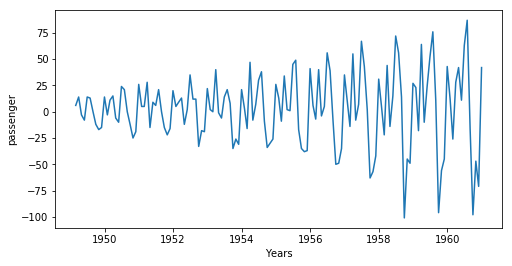

In [82]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('passenger')

Text(0, 0.5, 'Log (passenger)')

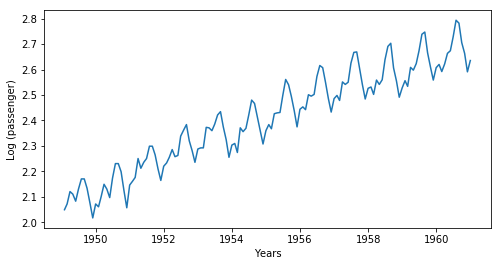

In [83]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (passenger)')

Text(0, 0.5, 'Differenced Log (passenger)')

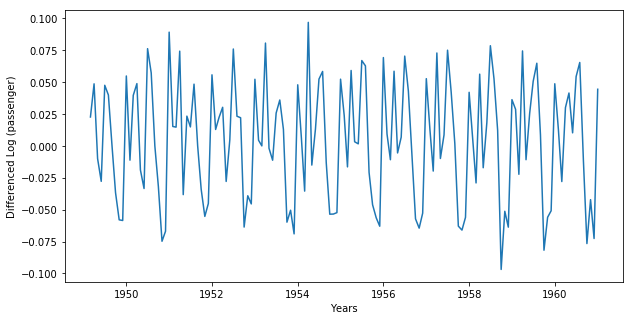

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (passenger)')

In [85]:
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

In [88]:
dftest = adfuller(sales_ts_log)
dftest

(-1.7170170891070176,
 0.42236677477036205,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -660.5794021236936)

In [89]:
dftest = adfuller(sales_ts_log_diff )
dftest

(-2.7171305983881444,
 0.07112054815085683,
 14,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 -653.8707758391575)

In [90]:
dftest = adfuller(np.log10(sales_ts) )
dftest

(-1.7170170891070176,
 0.42236677477036205,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 -660.5794021236936)

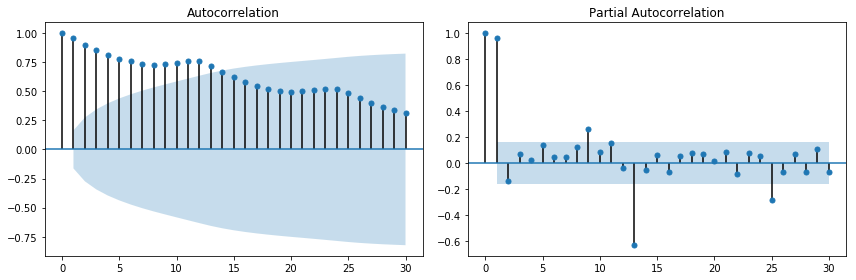

In [86]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

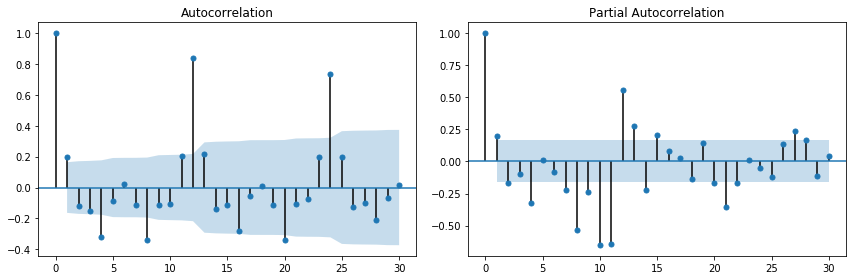

In [87]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

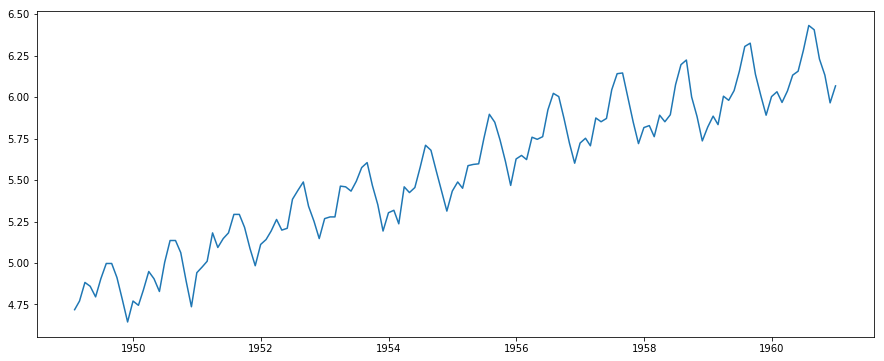

In [91]:
ts_log = np.log(sales_ts)
plt.plot(ts_log)

In [93]:
moving_avg=ts_log.rolling(window=12).mean()

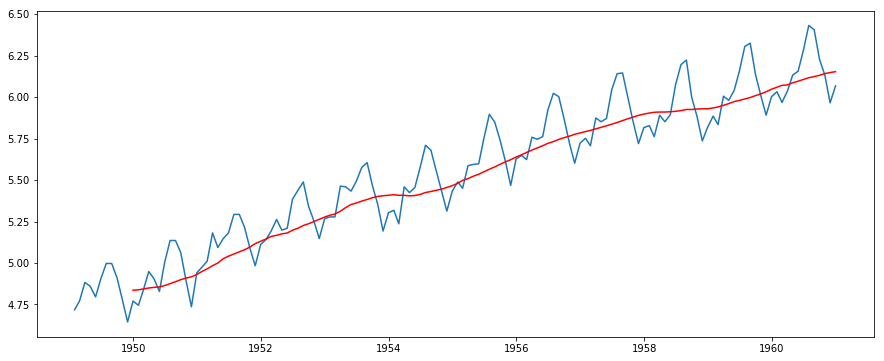

In [94]:

plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [95]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

1949-01-31         NaN
1949-02-28         NaN
1949-03-31         NaN
1949-04-30         NaN
1949-05-31         NaN
1949-06-30         NaN
1949-07-31         NaN
1949-08-31         NaN
1949-09-30         NaN
1949-10-31         NaN
1949-11-30         NaN
1949-12-31   -0.065494
Freq: M, Name: #Passengers, dtype: float64

In [96]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

1949-12-31   -0.065494
1950-01-31   -0.093449
1950-02-28   -0.007566
1950-03-31    0.099416
1950-04-30    0.052142
Freq: M, Name: #Passengers, dtype: float64

In [97]:
dftest = adfuller(ts_log_moving_avg_diff )
dftest

(-3.162907991300858,
 0.022234630001243844,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747125)

# Finally we get  p value is less than 0.05 then it is a stationarity

In [103]:
#Separate data into train and test
data['date'] = data.index
train = data[0:120]
test = data[120:]
train_sales_ts_log = ts_log_moving_avg_diff

In [104]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [107]:
import warnings
import itertools
warnings.filterwarnings("ignore")

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [108]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model -> AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 model -> AIC:-477.7146688889025


# Predict passengers on in-sample date using the best fit ARIMA model

In [109]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(1, 0, 0),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()

In [110]:
print(best_results.summary())


                                 Statespace Model Results                                 
Dep. Variable:                        #Passengers   No. Observations:                  133
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 12)   Log Likelihood                 242.857
Date:                            Thu, 28 Feb 2019   AIC                           -477.715
Time:                                    16:28:21   BIC                           -466.153
Sample:                                12-31-1949   HQIC                          -473.017
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6251      0.065      9.645      0.000       0.498       0.752
ar.S.L12       0.9899      0.008   

In [114]:
pred_dynamic = best_results.get_prediction(dynamic=True, full_results=True)

In [115]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [116]:
pred99 = best_results.get_forecast(steps=24, alpha=0.1)

In [121]:
pred99

# Calculate a 5 year moving average for the airline.csv dataset which is provided.

In [111]:
12*5

60

In [112]:
movingaverage=sales_ts.rolling(window=60).mean()

In [ ]:
Note: sales_ts is nothing but passenger_ts